# Proyek Analisis Data: [Bikeshare]
- **Nama:** [Fina Qurrotuna]
- **Email:** [qurrotunafina11@gmail.com]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Berapa jumlah penyewaan sepeda rata-rata per bulan pada tahun 2011-2012?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Seberapa besar pengaruh hari libur terhadap jumlah penyewaan sepeda pada jam sibuk (08:00-10:00 dan 17:00-19:00)?
- Seberapa besar pengaruh  jam sibuk (08:00-10:00 dan 17:00-19:00)terhadap jumlah penyewaan sepeda pada weekend dan day?
- Apakah ada tren penurunan atau peningkatan jumlah penyewaan sepeda selama tahun 2011-2012 di musim dingin?
- Bagaimana pola penggunaan sepeda oleh pengguna kasual dibandingkan dengan pengguna terdaftar di hari kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

load file hour.csv

In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


load file day.csv

In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Dataset ini berisi kumpulan data historis selama dua tahun (2011-2012) yang merekam aktivitas penyewaan sepeda di Washington D.C., Amerika Serikat. Terdapat 2 file utama dalam sataset ini
1. hour.csv: berisi data penyewaan sepeda yang dikumpulkan setiap jam.
2. day.csv: berisi data penyewaan sepeda yang dikumpulkan setiap hari.

Kedua dataset ini memiliki field yang sama kecuali kolom hr(hours) yang tidak ada pada file day.csv

FIELD
- instant: indeks catatan
- dteday: tanggal
- season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 sampai 12)
- hr: jam (0 sampai 23)
- holiday: apakah hari itu libur atau tidak (0: bukan hari libur, 1: hari libur)
- weekday: hari dalam minggu (0-6)
- workingday: 1 jika hari kerja (bukan akhir pekan atau hari libur), 0 jika tidak.
- weathersit: kondisi cuaca
(1: Cerah, beberapa awan, sebagian berawan
2: Kabut + Awan, Kabut + Awan terbuka, Kabut + Beberapa awan
3: Hujan ringan, Salju ringan, Petir + Awan terbuka 4: Hujan deras + Salju + Badai + Kabut)
- temp: Suhu normalisasi dalam Celsius (dibagi 41)
- atemp: Suhu terasa dalam Celsius (dibagi 50)
- hum: Kelembaban normalisasi (dibagi 100)
- windspeed: Kecepatan angin normalisasi (dibagi 67)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna terdaftar
- cnt: total jumlah penyewaan sepeda (termasuk pengguna kasual dan terdaftar)

### Assessing Data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hour_df.duplicated().sum()

0

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_df.duplicated().sum()

0

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

hour.csv
- data ini memiliki 17379 baris dengan 17 kolom.
- tidak terdapat data kosong atau null semua datanya lengkap.
- tidak terdapat data duplikat.

day.csv
- data ini memiliki 731 baris dengan 16 kolom
- tidak terdapat data kosong atau null, semua datanya lengkap.
- tidak terdapat data duplikat.

### Cleaning Data

**Insight:**

Disini kami tidak melakukan proses cleaning data, karena dilihat dari proses assesing data yang ada tidak terdapat null dan duplikat, bahkan pada kolom temp, atemp, hum dan windspeed sudah dilakukan normalisasi, ini menunjukkan data yang ada sudah siap digunakan.

## Exploratory Data Analysis (EDA)

### Rata-rata penyewaan sepeda per bulan pada tahun 2011 dan 2012

Rata-rata jumlah penyewaan per jam dalam satu bulan.

In [ ]:
hour_df.groupby(['yr', 'mnth'])['cnt'].mean().apply(np.floor)

yr  mnth
0   1        55.0
    2        74.0
    3        87.0
    4       131.0
    5       182.0
    6       199.0
    7       189.0
    8       186.0
    9       177.0
    10      166.0
    11      142.0
    12      117.0
1   1       130.0
    2       149.0
    3       221.0
    4       242.0
    5       263.0
    6       281.0
    7       273.0
    8       288.0
    9       303.0
    10      280.0
    11      212.0
    12      166.0
Name: cnt, dtype: float64

Rata-rata jumlah penyewaan per hari dalam satu bulan.

In [ ]:
day_df.groupby(['yr', 'mnth'])['cnt'].mean().apply(np.floor)

yr  mnth
0   1       1231.0
    2       1721.0
    3       2065.0
    4       3162.0
    5       4381.0
    6       4783.0
    7       4559.0
    8       4409.0
    9       4247.0
    10      3984.0
    11      3405.0
    12      2816.0
1   1       3120.0
    2       3556.0
    3       5318.0
    4       5807.0
    5       6318.0
    6       6761.0
    7       6567.0
    8       6919.0
    9       7285.0
    10      6414.0
    11      5088.0
    12      3990.0
Name: cnt, dtype: float64

**Insight**

Dilihat dari dari rata-rata penyewaan sepeda setiap bulan jumlah rata-rata penyewaanya meningkat sejak tahun 2011 hingga tahun 2012.

### Pengaruh cuaca terhadap rata-rata penyewaan sepeda

**Cuaca normal (kategori 1 dan 2)**

per jam

In [ ]:
normal_weathersit_hour = hour_df[(hour_df['weathersit'] < 3)]
normal_weathersit_hour_avg_rentals = normal_weathersit_hour.groupby(['weathersit'])['cnt'].mean().round()
print(normal_weathersit_hour_avg_rentals)

weathersit
1    205.0
2    175.0
Name: cnt, dtype: float64


per hari

In [ ]:
normal_weathersit_day = day_df[(day_df['weathersit'] < 3)]
normal_weathersit_day_avg_rentals = normal_weathersit_day.groupby(['weathersit'])['cnt'].mean().round()
print(normal_weathersit_day_avg_rentals)

weathersit
1    4877.0
2    4036.0
Name: cnt, dtype: float64


**Cuaca extreme (kategori 3 dan 4)**

per jam

In [ ]:
extreme_weathersit_hour = hour_df[(hour_df['weathersit'] >= 3)]
extreme_weathersit_hour_avg_rentals = extreme_weathersit_hour.groupby(['weathersit'])['cnt'].mean().round()
print(extreme_weathersit_hour_avg_rentals)

weathersit
3    112.0
4     74.0
Name: cnt, dtype: float64


per hari

In [ ]:
extreme_weathersit_day = day_df[(day_df['weathersit'] >= 3)]
extreme_day_weathersit_avg_rentals =extreme_weathersit_day.groupby(['weathersit'])['cnt'].mean().round()
print(extreme_day_weathersit_avg_rentals)

weathersit
3    1803.0
Name: cnt, dtype: float64


**Insight**

Rata-rata penyewaan sepeda pada saat cuaca normal (kategori 1 dan 2) lebih tinggi dibanding saat cuaca extreme (kategori 3 dan 4). Bahkan saat cuaca pada kategori 4 (Hujan deras + Salju + Badai + Kabut) tidak ada penyewaan sepeda sama sekali.

### Pengaruh hari pada rata-rata penyewaan sepeda (weekday dan weekend)

**Weekday**

per jam

In [ ]:
weekday_data_hour = hour_df[(hour_df['weekday'].isin([1,2,3,4,5]))]
weekday_hour_avg_rentals = weekday_data_hour .groupby(['weekday'])['cnt'].mean().round()
print(weekday_hour_avg_rentals)
print("Total: " ,weekday_hour_avg_rentals.sum())

weekday
1    184.0
2    191.0
3    191.0
4    196.0
5    196.0
Name: cnt, dtype: float64
Total:  958.0


per hari

In [ ]:
weekday_data_day = day_df[(day_df['weekday'].isin([1,2,3,4,5]))]
weekday_day_avg_rentals = weekday_data_day .groupby(['weekday'])['cnt'].mean().round()
print(weekday_day_avg_rentals)
print("Total: " ,weekday_day_avg_rentals.sum())

weekday
1    4338.0
2    4511.0
3    4549.0
4    4667.0
5    4690.0
Name: cnt, dtype: float64
Total:  22755.0


**Weekend**

per jam

In [ ]:
weekend_data_hour = hour_df[(hour_df['weekday'].isin([0,6]))]
weekend_hour_avg_rentals = weekend_data_hour.groupby(['weekday'])['cnt'].mean().round()
print(weekend_hour_avg_rentals)
print("Total: " ,weekend_hour_avg_rentals.sum())

weekday
0    177.0
6    190.0
Name: cnt, dtype: float64
Total:  367.0


In [ ]:
weekend_data_day = day_df[(day_df['weekday'].isin([0,6]))]
weekend_day_avg_rentals = weekend_data_day .groupby(['weekday'])['cnt'].mean().round()
print(weekend_day_avg_rentals)
print("Total: " ,weekend_day_avg_rentals.sum())

weekday
0    4229.0
6    4551.0
Name: cnt, dtype: float64
Total:  8780.0


**Insight**

Rata-rata penyewaan sepeda pada weekday lebih tinggi dibanding pada saat weekend.

### Pengaruh jam sibuk (08.00 - 10.00 dan 17.00 - 19.00) pada saat working day dan non working day

working day

In [ ]:
rush_day = hour_df[(hour_df['hr'].isin([8, 9, 17, 18])) & (hour_df['workingday'] == 1)]
avg_rentals_rush_day = rush_day['cnt'].mean().round()
print(avg_rentals_rush_day)

434.0


non working day

In [ ]:
relax_day = hour_df[(hour_df['hr'].isin([8, 9, 17, 18])) & (hour_df['workingday'] == 0)]
avg_rentals_relax_day = relax_day['cnt'].mean().round()
print(avg_rentals_relax_day)

220.0


**Insight**

Rata-rata penyewaan sepeda saat jam sibuk lebih tinggi saat working day dibandingkan saat non working day.

### Perbandingan penggunaan sepeda oleh pengguna kasual dibandingkan dengan pengguna terdaftar di weekday dan weekend

**weekday = working day**

per jam

In [ ]:
working_day_data = hour_df[hour_df['workingday'] == 1]
avg_casual = working_day_data['casual'].mean().round()
avg_registered = working_day_data['registered'].mean().round()

print(f"Rata-rata pengguna kasual: {avg_casual}")
print(f"Rata-rata pengguna terdaftar: {avg_registered}")

Rata-rata pengguna kasual: 26.0
Rata-rata pengguna terdaftar: 168.0


per hari

In [ ]:
working_day_data = day_df[day_df['workingday'] == 1]
avg_casual = working_day_data['casual'].mean().round()
avg_registered = working_day_data['registered'].mean().round()

print(f"Rata-rata pengguna kasual: {avg_casual}")
print(f"Rata-rata pengguna terdaftar: {avg_registered}")

Rata-rata pengguna kasual: 606.57
Rata-rata pengguna terdaftar: 3978.25


**weekend = non working day**

per jam

In [ ]:
working_day_data = hour_df[hour_df['workingday'] == 0]
avg_casual = working_day_data['casual'].mean().round()
avg_registered = working_day_data['registered'].mean().round()

print(f"Rata-rata pengguna kasual: {avg_casual}")
print(f"Rata-rata pengguna terdaftar: {avg_registered}")

Rata-rata pengguna kasual: 57.0
Rata-rata pengguna terdaftar: 124.0


per hari

In [ ]:
working_day_data = day_df[day_df['workingday'] == 0]
avg_casual = working_day_data['casual'].mean().round()
avg_registered = working_day_data['registered'].mean().round()

print(f"Rata-rata pengguna kasual: {avg_casual}")
print(f"Rata-rata pengguna terdaftar: {avg_registered}")

Rata-rata pengguna kasual: 1371.0
Rata-rata pengguna terdaftar: 2959.0


**Insight**

Rata-rata penyewaan sepeda lebih banyak dilakukan oleh pengguna terdaftar daripada pengguna kasual baik pada weekend maupun weekday.

## Visualization & Explanatory Analysis

**Rata-rata penyewaan sepeda per bulan sejak tahun 2011-2012**

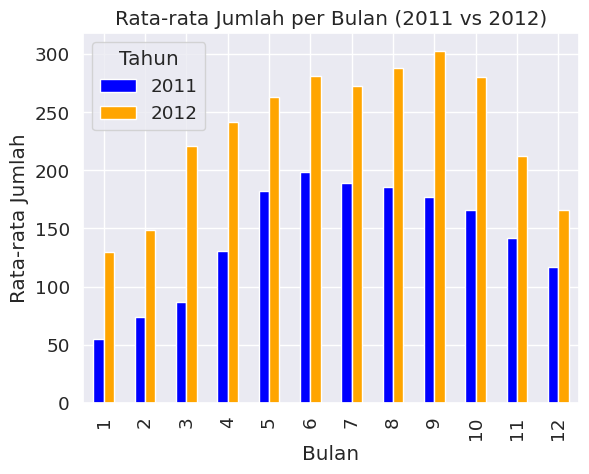

In [ ]:
df_grouped = hour_df.groupby(['yr', 'mnth'])['cnt'].mean().apply(np.floor).reset_index()

# Pivot data untuk memudahkan plotting
df_pivot = df_grouped.pivot(index='mnth', columns='yr', values='cnt').rename(columns={0: 2011, 1: 2012})

# Buat bar chart
df_pivot.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah')
plt.title('Rata-rata Jumlah per Bulan (2011 vs 2012)')
plt.legend(title='Tahun')
plt.show()

**Insight**

Rata-rata penyewaan sepeda pada tahun 2012 lebih tinggi dibanding dengan tahun 2011.

**Rata-rata penyewaan sepeda berdasarkan cuaca**

per jam

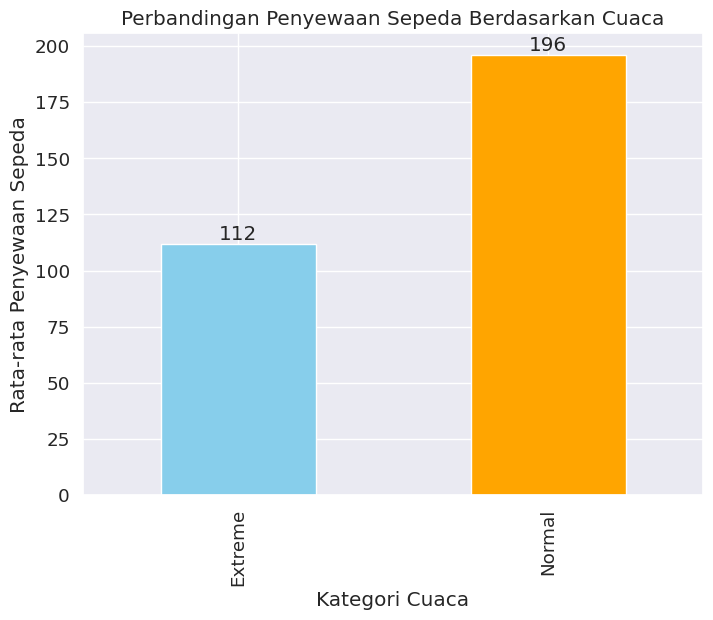

In [ ]:
# Mengelompokkan cuaca menjadi dua kategori: normal (1 dan 2) dan extreme (3 dan 4)
hour_df['weather_category'] = hour_df['weathersit'].apply(lambda x: 'Normal' if x in [1, 2] else 'Extreme')

# Menghitung rata-rata penyewaan sepeda per hari berdasarkan kategori cuaca
average_rentals_per_weather = hour_df.groupby('weather_category')['cnt'].mean().round()

# Membuat bar chart untuk membandingkan rata-rata penyewaan sepeda berdasarkan kategori cuaca
plt.figure(figsize=(8, 6))
average_rentals_per_weather.plot(kind='bar', color=['skyblue', 'orange'])

# Memberi label pada sumbu
plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')

# Menampilkan nilai rata-rata di atas setiap bar
for index, value in enumerate(average_rentals_per_weather):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.show()

per hari

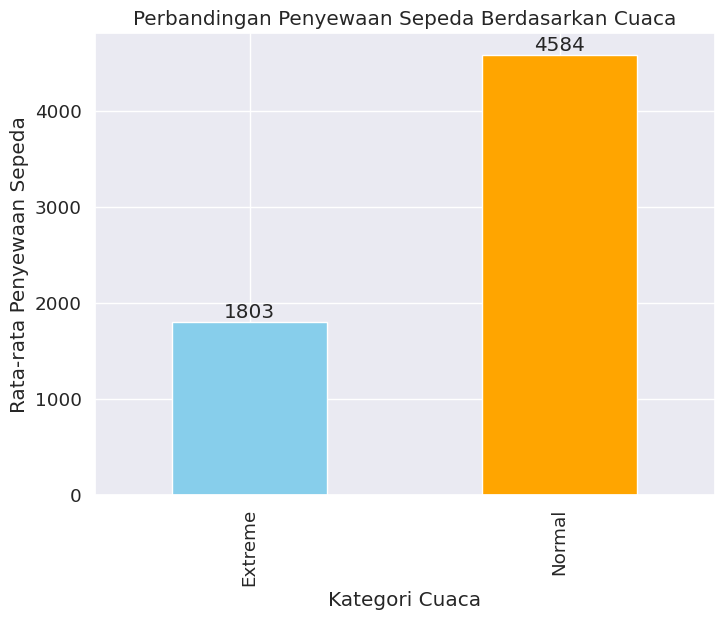

In [ ]:
# Mengelompokkan cuaca menjadi dua kategori: normal (1 dan 2) dan extreme (3 dan 4)
day_df['weather_category'] = day_df['weathersit'].apply(lambda x: 'Normal' if x in [1, 2] else 'Extreme')

# Menghitung rata-rata penyewaan sepeda per hari berdasarkan kategori cuaca
average_rentals_per_weather = day_df.groupby('weather_category')['cnt'].mean().round()

# Membuat bar chart untuk membandingkan rata-rata penyewaan sepeda berdasarkan kategori cuaca
plt.figure(figsize=(8, 6))
average_rentals_per_weather.plot(kind='bar', color=['skyblue', 'orange'])

# Memberi label pada sumbu
plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')

# Menampilkan nilai rata-rata di atas setiap bar
for index, value in enumerate(average_rentals_per_weather):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.show()

**Insight**
Rata-rata penyewaan sepeda saat cuaca normal lebih tinggi dibandingkan saat cuaca extreme.

Perbandingan berdasarkan hari

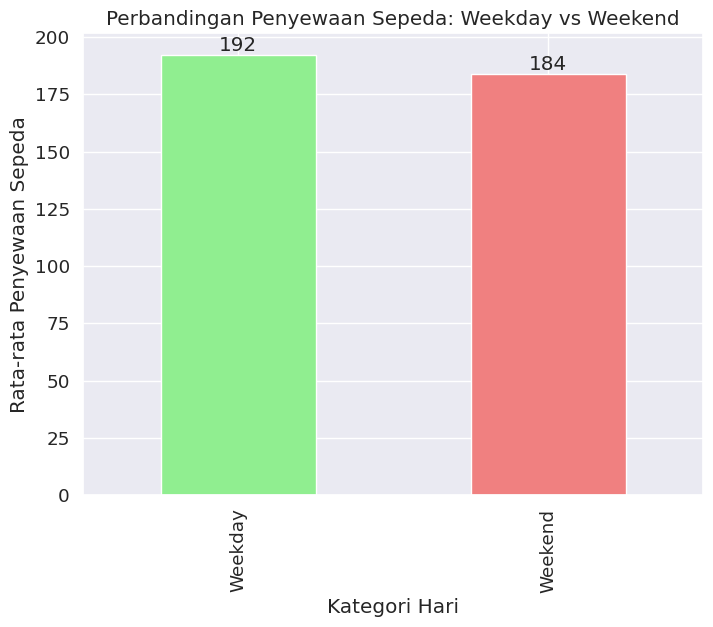

In [ ]:
# Mengelompokkan hari menjadi dua kategori: weekday (1, 2, 3, 4, 5) dan weekend (0, 6)
hour_df['day_category'] = hour_df['weekday'].apply(lambda x: 'Weekday' if x in [1, 2, 3, 4, 5] else 'Weekend')

# Menghitung rata-rata penyewaan sepeda per hari berdasarkan kategori hari (weekday vs weekend)
average_rentals_per_day = hour_df.groupby('day_category')['cnt'].mean().round()

# Membuat bar chart untuk membandingkan rata-rata penyewaan sepeda berdasarkan kategori hari
plt.figure(figsize=(8, 6))
average_rentals_per_day.plot(kind='bar', color=['lightgreen', 'lightcoral'])

# Memberi label pada sumbu
plt.title('Perbandingan Penyewaan Sepeda: Weekday vs Weekend')
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')

# Menampilkan nilai rata-rata di atas setiap bar
for index, value in enumerate(average_rentals_per_day):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.show()

**Insight**

Rata-rata penyewaan sepeda pada weekday lebih tinggi dibanding pada saat weekend.

**Perbandingan pengguna kasual dan registered saat weekday dan weekend**

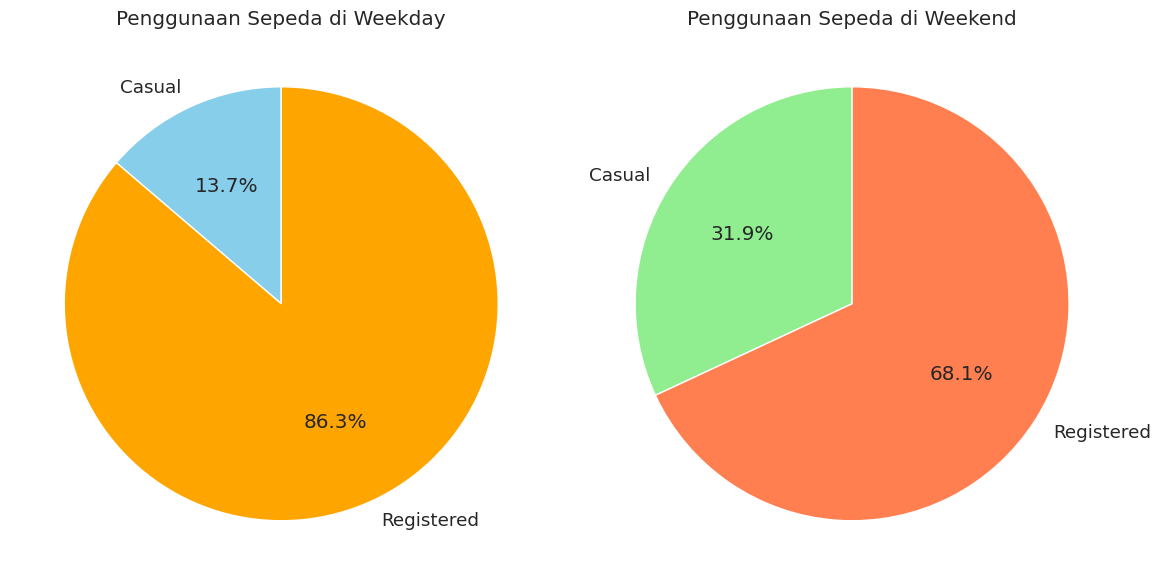

In [ ]:
# Mengelompokkan hari menjadi dua kategori: weekday (1, 2, 3, 4, 5) dan weekend (0, 6)
hour_df['day_category'] = hour_df['weekday'].apply(lambda x: 'Weekday' if x in [1, 2, 3, 4, 5] else 'Weekend')

# Menghitung total penyewaan sepeda oleh pengguna kasual dan terdaftar di hari kerja (weekday)
weekday_data = hour_df[hour_df['day_category'] == 'Weekday']
weekday_rentals = [weekday_data['casual'].sum(), weekday_data['registered'].sum()]

# Menghitung total penyewaan sepeda oleh pengguna kasual dan terdaftar di akhir pekan (weekend)
weekend_data = hour_df[hour_df['day_category'] == 'Weekend']
weekend_rentals = [weekend_data['casual'].sum(), weekend_data['registered'].sum()]

# Membuat pie chart untuk weekday
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(weekday_rentals, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Penggunaan Sepeda di Weekday')

# Membuat pie chart untuk weekend
plt.subplot(1, 2, 2)
plt.pie(weekend_rentals, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'coral'])
plt.title('Penggunaan Sepeda di Weekend')

# Menampilkan kedua pie chart
plt.tight_layout()
plt.show()

Rata-rata penyewa sepeda registered lebih banyak dibanding dengan pengguna kasual baik saat weekeend maupun weekday.

## Conclusion

- Penyewa sepeda trus meningkat setiap tahunnya sejak tahun 2011 hingga tahun 2012.
- Cuaca cukup berpengaruh terhadap rata-rata penyewaan sepeda, karena pada cuaca extreme orang-orang cenderung tidak bisa keluar rumah otamatis tidak menyewa sepeda.
- Jumlah penyewa saat weekday lebih banyak dibandingkan saat weekend.
- Pada jam-jam sibuk (08.00-10.00 dan 17.00-19.00) penyewaan sepeda lebih banyak dibandingkan dengan selain jam-jam tersebut.
- Jumlah pengguna registered lebih banyak melakukan penyewaan sepeda dibandingkan pengguna kasual baik saat weekday maupun weekend